In [1]:
#1. Load data
import pandas as pd
df = pd.read_csv('D:\IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
# 2. Data preparation
# Check missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [3]:

# Remove special characters and extra whitespace
import re

clean_reviews = []
for review in df['review']:
    review = re.sub('[^a-zA-Z\']', ' ', review)
    review = re.sub('\s+', ' ', review)
    review = re.sub('Oz|br', '',review)
    clean_reviews.append(review)

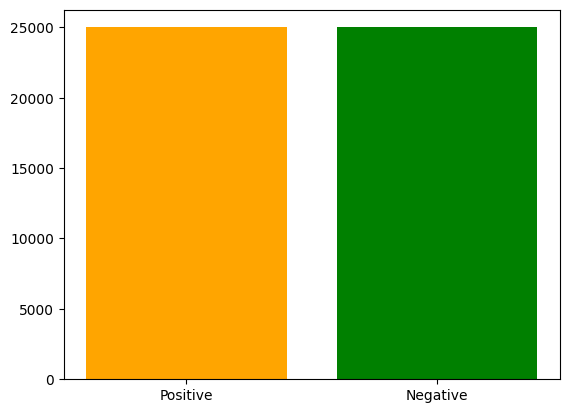

In [4]:
# Data visualization
import matplotlib.pyplot as plt
count = df["sentiment"].value_counts().values
labels = ["Positive", "Negative"]
color = ["orange", "green"]
plt.bar(labels, count, color = color)
plt.show()

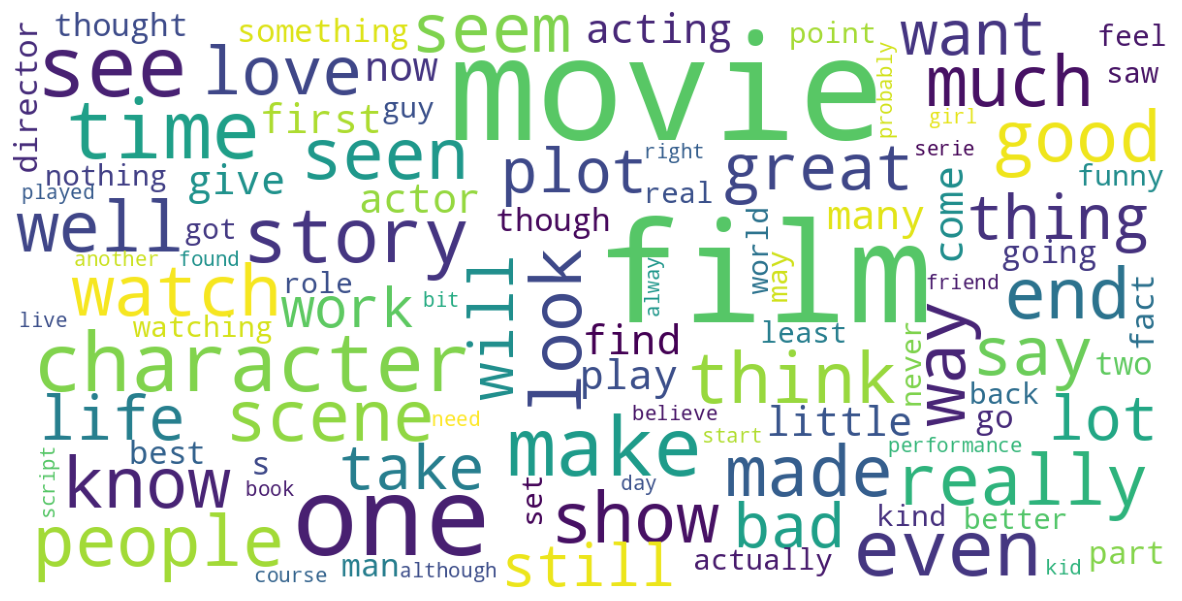

In [5]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=100,
                      max_font_size=50,
                      scale=3,
                      random_state=42)

wordcloud=wordcloud.generate(str(clean_reviews))
fig = plt.figure(1, figsize=(15, 12))
plt.axis('off')
plt.imshow(wordcloud)

In [6]:
# Remove stopwords with negation handling
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

negation = ['couldn', 'isn', 'wasn', 'wouldn', "shouldn't", 'doesn', 'needn', \
      'haven', 'didn', "wasn't", "hasn't", "weren't", 'mightn', 'shouldn',\
      "isn't", "won't", "didn't", 'hasn', "mustn't", 'hadn', "haven't", "don't", \
      "mightn't", "doesn't", "couldn't", "hadn't", "aren't", "wouldn't", 'mustn', \
      "needn't", 'shan', 'don', 'weren', 'ain', "shan't", 'aren', 'won', 'not']

stopword_wo_negation = [x for x in stop_words if x not in negation]

In [7]:
# Stemming
from nltk.stem import SnowballStemmer
ss = SnowballStemmer("english")
def stem(review):
    lst = []
    for word in review.split():
        stem = ss.stem(word)
        if stem not in stopword_wo_negation:
            lst.append(stem)
    return ' '.join(lst)

final = [stem(review) for review in clean_reviews]
X = final

In [8]:
# Labeling the sentiment data
from sklearn.preprocessing import LabelBinarizer

label = LabelBinarizer()
Y = label.fit_transform(df['sentiment'])

In [9]:
# Split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,\
                                                    random_state = 42, shuffle = True)

In [10]:
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
 
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [11]:
# 4. Train model
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix,\
accuracy_score

In [12]:
# Compare model using cross validation
num_folds = 10
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression(max_iter = 1000)))
models.append(('Linear SVC', LinearSVC()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state = 42, shuffle = True)
    cross_val = cross_val_score(model, X_train, Y_train.ravel(), cv = kfold, \
                                scoring = scoring)
    results.append(cross_val)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cross_val.mean(), cross_val.std())
    print(msg)

LR: 0.891950 (0.006322)
Linear SVC: 0.892625 (0.006387)


In [13]:
# Model performance on test data
model = LinearSVC()
model.fit(X_train, Y_train.ravel())
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.8972
